# AS/AD model

In [4]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local moduless
#import modelproject

We've decided to explore the AS/AD model, beginning with its application in a closed economy context. Subsequently, we'll expand our analysis by introducing variations of the model, incorporating fixed exchange rates and examining its implications within an open economy framework.

## Model Description (Closed economy)

1. **IS:** $$ y_{t} - \bar{y} = \alpha_{1} (g_{t} - \bar{g}) - \alpha_{2} (r_{t} - \bar{r}) - \alpha_{3} (\tau_{t} - \bar{\tau}) + v_{t} $$

2. **Real interest rate:** $$ r_{t} \equiv i_{t} - \pi^e_{t+1} $$

3. **Nominal interest rate:** $$ i_{t} = \bar{r} + \pi^e + h (y_{t} - \bar{y}) + b (\pi_{t} - \pi^{*}) + \hat{\rho}_{t} $$

4. **Phillips curve:** $$ \pi_{t} = \pi^e_t + \gamma (y_{t} - \bar{y}) + s_{t} $$

5. **Expectations formation:** $$ \pi^e_t = \pi_{t-1} $$

Which (with some math) can be derived as

6. **AD-curve:** $$y_{t}-\bar{y} = -a (\pi^{\ast}-\pi_t) + z \Leftrightarrow \pi_t = \frac{1}{a}(y_{t} - \bar{y} - a\pi^{\ast} + z) $$

7.  **AS curve:** $$\pi_t = \pi_{t-1} + \gamma (y-\bar{y}) + s_t$$

where
$$a \equiv \frac{\alpha_2 h}{1 + \alpha_2b}, \quad z_t \equiv \frac{\alpha_1(g_t - \bar{g}) + \alpha_3(\tau - \bar{\tau}) + v_t - \alpha_2\hat{\rho}_t}{1 + \alpha_2b}$$





8. **Outputgap:** $$\hat{y}_{t} =y -\bar{y}$$
9. **Inflationgap:** $$\hat{\pi}_{t} = \pi-\pi^{\ast}$$

The model's shock parameters $v_t$, $\hat{\rho}_t$, and $s_t$ are all initially set to zero. The model's other parameters are strictly positive. Note that by a positive supply shock, we understand a decrease in $s_t$

Solving the model numerically with an simulation 

In [5]:
import numpy as np

# Parameters
alpha1, alpha2, alpha3, h, b, gamma, pi_star, r_bar = 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 2, 0.5
num_periods = 50  # Number of periods to simulate

# Exogenous and initial conditions
g_t = np.zeros(num_periods)
tau_t = np.zeros(num_periods)
v_t = np.zeros(num_periods)
rho_t = np.zeros(num_periods)
s_t = np.zeros(num_periods)  # Supply shock
pi_t = np.zeros(num_periods) + pi_star  # Inflation starts at target
y_t = np.zeros(num_periods)
r_t = np.zeros(num_periods)
i_t = np.zeros(num_periods)
pi_e_t = np.zeros(num_periods) + pi_star  # Initial expected inflation

# Simulation over time
for t in range(1, num_periods):
    pi_e_t[t] = pi_t[t-1]  # Update expectations
    r_t[t] = i_t[t-1] - pi_e_t[t]  # Real interest rate
    i_t[t] = r_bar + pi_e_t[t] + h * (y_t[t-1] - 0) + b * (pi_t[t-1] - pi_star) + rho_t[t]  # Taylor rule
    pi_t[t] = pi_t[t-1] + gamma * (y_t[t-1] - 0) + s_t[t]  # Phillips curve
    z_t = alpha1 * (g_t[t] - 0) - alpha2 * (r_t[t] - r_bar) - alpha3 * (tau_t[t] - 0) + v_t[t]  # From IS equation
    y_t[t] = -alpha2 * h / (1 + alpha2 * b) * (pi_star - pi_t[t]) + z_t  # From AD curve

# Output results
print("Equilibrium Output Gap:", y_t[-1])
print("Equilibrium Inflation Rate:", pi_t[-1])


Equilibrium Output Gap: -0.00030025166349436066
Equilibrium Inflation Rate: 2.124844186606628


# Policy evaluations

### 1: positive supply shock

Initially the economy is in equilibrium. We analyze the effects of a positive supply shock hitting the economy in period 1 and disappearing in period 2.
We want to illustrate the effects in the short and long run using a $y-\pi$ diagram. Then provide some intuition.

The model's shock parameters $v_t$, $\hat{\rho}_t$, and $s_t$ are all initially set to zero. The model's other parameters are strictly positive. Note that by a positive supply shock, we understand a decrease in $s_t$

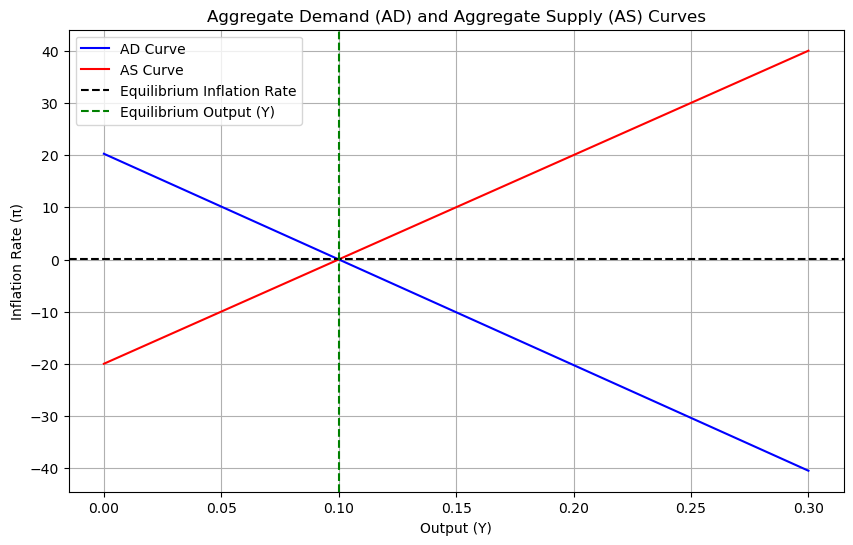

In [ ]:
# Parameters
ar = 0.02
y_bar = 0.1
gamma = 200  # Positive slope
alpha_1 = 0.025
alpha_2 = 0.025
alpha_3 = 0.025
h = 0.2
b = 0.5
g_bar = 0.2
tau_bar = 0.2
tau = 0.2
g_t = 0.2
v_t = 0
rho_t = 0
s_t = 0
pi = 0.02
pi_1 = 0.02

# Function to calculate z_t
def calculate_z_t(alpha_1, h, alpha_2, b, g_t, g_bar, alpha_3, tau, tau_bar, v_t, rho_t):
    a = (alpha_2 * h) / (1 + alpha_2 * b)
    z_t = (alpha_1 * (g_t - g_bar) + alpha_3 * (tau - tau_bar) + v_t - alpha_2 * rho_t) / (1 + alpha_2 * b)
    return z_t

# Function to calculate a
def a(alpha_2, h, b):
    a = (alpha_2 * h) / (1 + alpha_2 * b)
    return a

# calculate z_t
z_t = calculate_z_t(alpha_1, h, alpha_2, b, g_t, g_bar, alpha_3, tau, tau_bar, v_t, rho_t)

# Define AD and AS curves
def ad_curve(y, y_bar, alpha, pi_star, pi, z_t): ##<--------------------------------- you don't need the pi input here, since it's not used in the calculation
    pi = - 1 / a(alpha_2, h, b) * (y - y_bar - z_t) + pi_star
    return pi

def as_curve(pi, pi_1, gamma, y, y_bar, s_t): ##<--------------------------------- same here
    pi = pi_1 + gamma * (y - y_bar) + s_t
    return pi

# Range of output values
output_range = np.linspace(0, 0.3, 100)

# Calculate AD and AS curves
ad_values = ad_curve(output_range, y_bar, alpha_2, pi, pi, z_t)
as_values = as_curve(pi, pi_1, gamma, output_range, y_bar, s_t)

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(output_range, ad_values, label='AD Curve', color='blue')
plt.plot(output_range, as_values, label='AS Curve', color='red')
plt.xlabel('Output (Y)')
plt.ylabel('Inflation Rate (π)')
plt.title('Aggregate Demand (AD) and Aggregate Supply (AS) Curves')
plt.axhline(y=pi, color='black', linestyle='--', label='Equilibrium Inflation Rate')
plt.axvline(x=output_range[np.argmin(np.abs(ad_values - as_values))], color='green', linestyle='--', label='Equilibrium Output (Y)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import root

# Parameters (already defined previously)
ar = 0.02
y_bar = 0.1
gamma = 200  # Positive slope
alpha_1 = 0.025
alpha_2 = 0.025
alpha_3 = 0.025
h = 0.2
b = 0.5
g_bar = 0.2
tau_bar = 0.2
tau = 0.2
g_t = 0.2
v_t = 0
rho_t = 0
s_t = 0
pi = 0.02
pi_1 = 0.02

# Function to calculate z_t
def calculate_z_t(alpha_1, h, alpha_2, b, g_t, g_bar, alpha_3, tau, tau_bar, v_t, rho_t):
    z_t = (alpha_1 * (g_t - g_bar) + alpha_3 * (tau - tau_bar) + v_t - alpha_2 * rho_t) / (1 + alpha_2 * b)
    return z_t

# Function to calculate a
def a(alpha_2, h, b):
    return (alpha_2 * h) / (1 + alpha_2 * b)

# Calculate z_t
z_t = calculate_z_t(alpha_1, h, alpha_2, b, g_t, g_bar, alpha_3, tau, tau_bar, v_t, rho_t)

# Define AD curve function
def ad_curve(y, y_bar, pi_star, z_t):
    return - 1 / a(alpha_2, h, b) * (y - y_bar - z_t) + pi_star

# Define AS curve function
def as_curve(y, pi_1, gamma, y_bar, s_t):
    return pi_1 + gamma * (y - y_bar) + s_t

# Function to compute excess demand (difference between AD and AS curves)
def excess_demand(y):
    pi_ad = ad_curve(y, y_bar, pi, z_t)
    pi_as = as_curve(y, pi_1, gamma, y_bar, s_t)
    return pi_ad - pi_as

# Initial guess for y (output level)
y_guess = 0.1

# Use root finder to find the equilibrium output level
result = root(excess_demand, y_guess)

# Check if the root finder was successful
if result.success:
    equilibrium_y = result.x[0]
    print("Equilibrium Output (Y):", equilibrium_y)
    
    # Calculate the corresponding equilibrium inflation rate
    equilibrium_pi = ad_curve(equilibrium_y, y_bar, pi, z_t)
    print("Equilibrium Inflation Rate (π):", equilibrium_pi)
else:
    print("Failed to find equilibrium")


Equilibrium Output (Y): 0.1
Equilibrium Inflation Rate (π): 0.02


Above, we see that the economy initially finds itself in the long-run equilibrium, where $ y = \bar{y} $ and $ \pi = \pi^* $. Then comes the positive supply shock


<span style="color:red;"> Nice. To demonstrate some extra numerical skills, you could find the equilibrium using a root finder. This can be done the same way as we've done in class: make a function that computes excess aggregate demand for a given pi, and then find the pi that makes excess demand 0.

Analyze the effects of a positive supply shock hitting the economy in period 1 and disappearing in period 2.
We want to illustrate the effects in the short and long run using a $y-\pi$ diagram. Then provide some intuition.

Initial Equilibrium Output (Y): 0.1
Initial Equilibrium Inflation Rate (π): 0.02
Equilibrium Output (Y) after Positive Shock: 0.12484472049689442
Equilibrium Inflation Rate (π) after Positive Shock: -5.011055900621119


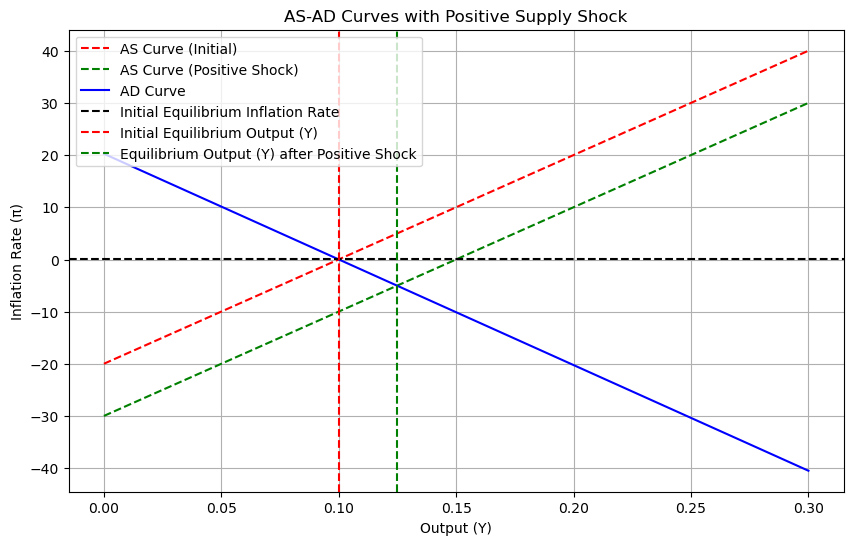

In [ ]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

# Parameters (already defined previously)
ar = 0.02
y_bar = 0.1
gamma = 200  # Positive slope
alpha_1 = 0.025
alpha_2 = 0.025
alpha_3 = 0.025
h = 0.2
b = 0.5
g_bar = 0.2
tau_bar = 0.2
tau = 0.2
g_t = 0.2
v_t = 0
rho_t = 0
s_t_initial = 0
s_t_new = -10
pi = 0.02
pi_1 = 0.02

# Function to calculate z_t
def calculate_z_t(alpha_1, h, alpha_2, b, g_t, g_bar, alpha_3, tau, tau_bar, v_t, rho_t):
    z_t = (alpha_1 * (g_t - g_bar) + alpha_3 * (tau - tau_bar) + v_t - alpha_2 * rho_t) / (1 + alpha_2 * b)
    return z_t

# Function to calculate a
def a(alpha_2, h, b):
    return (alpha_2 * h) / (1 + alpha_2 * b)

# Calculate z_t
z_t = calculate_z_t(alpha_1, h, alpha_2, b, g_t, g_bar, alpha_3, tau, tau_bar, v_t, rho_t)

# Define AD curve function
def ad_curve(y, y_bar, pi_star, z_t):
    return - 1 / a(alpha_2, h, b) * (y - y_bar - z_t) + pi_star

# Define AS curve function
def as_curve(y, pi_1, gamma, y_bar, s_t):
    return pi_1 + gamma * (y - y_bar) + s_t

# Function to compute excess demand (difference between AD and AS curves)
def excess_demand(y, s_t):
    pi_ad = ad_curve(y, y_bar, pi, z_t)
    pi_as = as_curve(y, pi_1, gamma, y_bar, s_t)
    return pi_ad - pi_as

# Initial guess for y (output level)
y_guess = 0.1

# Use root finder to find the equilibrium output level for initial supply shock
result_initial = root(excess_demand, y_guess, args=(s_t_initial,))

# Use root finder to find the equilibrium output level for positive supply shock
result_positive = root(excess_demand, y_guess, args=(s_t_new,))

# Check if the root finder was successful and print the results
if result_initial.success and result_positive.success:
    equilibrium_y_initial = result_initial.x[0]
    equilibrium_y_positive = result_positive.x[0]

    print("Initial Equilibrium Output (Y):", equilibrium_y_initial)
    print("Initial Equilibrium Inflation Rate (π):", ad_curve(equilibrium_y_initial, y_bar, pi, z_t))
    print("Equilibrium Output (Y) after Positive Shock:", equilibrium_y_positive)
    print("Equilibrium Inflation Rate (π) after Positive Shock:", ad_curve(equilibrium_y_positive, y_bar, pi, z_t))
else:
    print("Failed to find equilibrium")

# Range of output values
output_range = np.linspace(0, 0.3, 100)

# Calculate AD curve in equilibrium
ad_values_initial = ad_curve(output_range, y_bar, pi, z_t)

# Calculate AS curves
as_values_initial = pi_1 + gamma * (output_range - y_bar) + s_t_initial
as_values_positive = pi_1 + gamma * (output_range - y_bar) + s_t_new

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(output_range, as_values_initial, label='AS Curve (Initial)', color='red', linestyle='--')
plt.plot(output_range, as_values_positive, label='AS Curve (Positive Shock)', color='green', linestyle='--')
plt.plot(output_range, ad_values_initial, label='AD Curve', color='blue')
plt.xlabel('Output (Y)')
plt.ylabel('Inflation Rate (π)')
plt.title('AS-AD Curves with Positive Supply Shock')
plt.axhline(y=pi, color='black', linestyle='--', label='Initial Equilibrium Inflation Rate')
plt.axvline(x=equilibrium_y_initial, color='red', linestyle='--', label='Initial Equilibrium Output (Y)')
plt.axvline(x=equilibrium_y_positive, color='green', linestyle='--', label='Equilibrium Output (Y) after Positive Shock')
plt.legend()
plt.grid(True)
plt.show()


In period 1, the positive supply shock hits, causing the AS curve to shift downward by the distance $|s_t|$, resulting in lower inflation and higher output. The economic interpretation is that the supply shock puts downward pressure on inflation. This prompts the central bank to ease monetary policy, leading to an increase in output. The rise in output boosts employment, causing the marginal product of labor to decline, and consequently, the marginal production costs increase. This puts upward pressure on inflation, explaining why inflation falls less than $|s|$. The upward pressure on inflation prompts the central bank to moderate the easing of monetary policy. Then the shock dissappears ($s_2=0$). <span style="color:red;"> Once again, you could find actual equilibrium using the method I described above.

The inflation expectations are static, so $\pi_{2e} = \pi_{1}$. The AS curve shifts upward, so it intersects the point $(\bar{y}, \pi_{1})$, <span style="color:red;"> mark this point in the plot </span> and the economy moves from equilibrium $E_{1}$ to $E_{2}$ <span style="color:red;"> these as well </span>, where output is lower and inflation is higher. Economically, the explanation is that the removal of the shock pushes inflation upward, while the adjustment in inflation expectations pulls inflation downward. The net effect is that inflation rises compared to the previous period, prompting the central bank to tighten monetary policy (from an accommodative stance), causing output to fall but remain above the structural level.

Initial Equilibrium Output (Y): 0.1
Initial Equilibrium Inflation Rate (π): 0.02
Equilibrium Output (Y) after Positive Shock: 0.12484472049689442
Equilibrium Inflation Rate (π) after Positive Shock: -5.011055900621119
Equilibrium Output (Y) after Newer Shock: 0.1124223602484472
Equilibrium Inflation Rate (π) after Newer Shock: -2.495527950310558


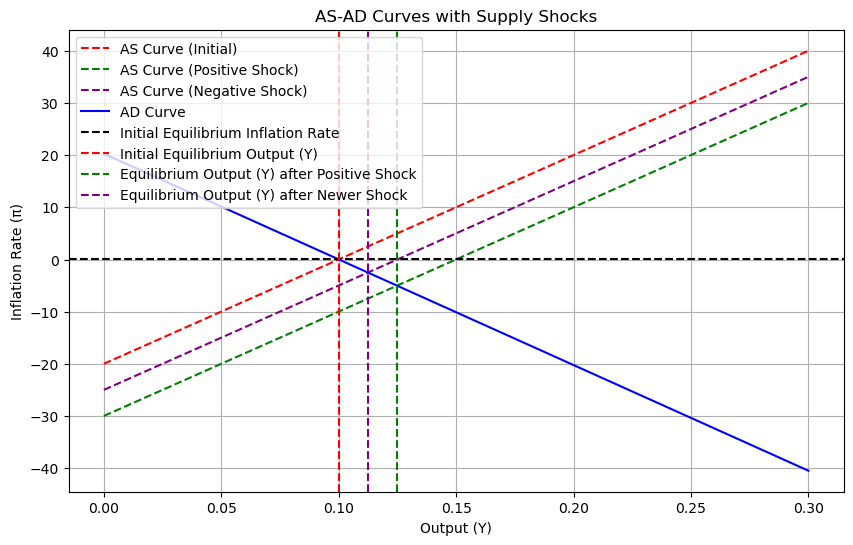

In [ ]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

# Parameters (already defined previously)
ar = 0.02
y_bar = 0.1
gamma = 200  # Positive slope
alpha_1 = 0.025
alpha_2 = 0.025
alpha_3 = 0.025
h = 0.2
b = 0.5
g_bar = 0.2
tau_bar = 0.2
tau = 0.2
g_t = 0.2
v_t = 0
rho_t = 0
s_t_initial = 0
s_t_new = -10
s_t_newer = -5
pi = 0.02
pi_1 = 0.02

# Function to calculate z_t
def calculate_z_t(alpha_1, h, alpha_2, b, g_t, g_bar, alpha_3, tau, tau_bar, v_t, rho_t):
    z_t = (alpha_1 * (g_t - g_bar) + alpha_3 * (tau - tau_bar) + v_t - alpha_2 * rho_t) / (1 + alpha_2 * b)
    return z_t

# Function to calculate a
def a(alpha_2, h, b):
    return (alpha_2 * h) / (1 + alpha_2 * b)

# Calculate z_t
z_t = calculate_z_t(alpha_1, h, alpha_2, b, g_t, g_bar, alpha_3, tau, tau_bar, v_t, rho_t)

# Define AD curve function
def ad_curve(y, y_bar, pi_star, z_t):
    return - 1 / a(alpha_2, h, b) * (y - y_bar - z_t) + pi_star

# Define AS curve function
def as_curve(y, pi_1, gamma, y_bar, s_t):
    return pi_1 + gamma * (y - y_bar) + s_t

# Function to compute excess demand (difference between AD and AS curves)
def excess_demand(y, s_t):
    pi_ad = ad_curve(y, y_bar, pi, z_t)
    pi_as = as_curve(y, pi_1, gamma, y_bar, s_t)
    return pi_ad - pi_as

# Initial guess for y (output level)
y_guess = 0.1

# Use root finder to find the equilibrium output level for initial supply shock
result_initial = root(excess_demand, y_guess, args=(s_t_initial,))

# Use root finder to find the equilibrium output level for positive supply shock
result_positive = root(excess_demand, y_guess, args=(s_t_new,))

# Use root finder to find the equilibrium output level for newer supply shock
result_newer = root(excess_demand, y_guess, args=(s_t_newer,))

# Check if the root finder was successful and print the results
if result_initial.success and result_positive.success and result_newer.success:
    equilibrium_y_initial = result_initial.x[0]
    equilibrium_y_positive = result_positive.x[0]
    equilibrium_y_newer = result_newer.x[0]

    print("Initial Equilibrium Output (Y):", equilibrium_y_initial)
    print("Initial Equilibrium Inflation Rate (π):", ad_curve(equilibrium_y_initial, y_bar, pi, z_t))
    print("Equilibrium Output (Y) after Positive Shock:", equilibrium_y_positive)
    print("Equilibrium Inflation Rate (π) after Positive Shock:", ad_curve(equilibrium_y_positive, y_bar, pi, z_t))
    print("Equilibrium Output (Y) after Newer Shock:", equilibrium_y_newer)
    print("Equilibrium Inflation Rate (π) after Newer Shock:", ad_curve(equilibrium_y_newer, y_bar, pi, z_t))
else:
    print("Failed to find equilibrium")

# Range of output values
output_range = np.linspace(0, 0.3, 100)

# Calculate AD curve in equilibrium
ad_values_initial = ad_curve(output_range, y_bar, pi, z_t)

# Calculate AS curves
as_values_initial = pi_1 + gamma * (output_range - y_bar) + s_t_initial
as_values_positive = pi_1 + gamma * (output_range - y_bar) + s_t_new
as_values_newer = pi_1 + gamma * (output_range - y_bar) + s_t_newer

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(output_range, as_values_initial, label='AS Curve (Initial)', color='red', linestyle='--')
plt.plot(output_range, as_values_positive, label='AS Curve (Positive Shock)', color='green', linestyle='--')
plt.plot(output_range, as_values_newer, label='AS Curve (Negative Shock)', color='purple', linestyle='--')
plt.plot(output_range, ad_values_initial, label='AD Curve', color='blue')
plt.xlabel('Output (Y)')
plt.ylabel('Inflation Rate (π)')
plt.title('AS-AD Curves with Supply Shocks')
plt.axhline(y=pi, color='black', linestyle='--', label='Initial Equilibrium Inflation Rate')
plt.axvline(x=equilibrium_y_initial, color='red', linestyle='--', label='Initial Equilibrium Output (Y)')
plt.axvline(x=equilibrium_y_positive, color='green', linestyle='--', label='Equilibrium Output (Y) after Positive Shock')
plt.axvline(x=equilibrium_y_newer, color='purple', linestyle='--', label='Equilibrium Output (Y) after Newer Shock')
plt.legend()
plt.grid(True)
plt.show()


<span style="color:red;"> Ok - but remember that the point of this course is to demonstrate your knowledge of numerical methods. I think you get around that part a bit too easily. It would help to use a root finder to find the equilibrium. You could also try to simulate the convergence back towards steady state for this given shock.

# Extension of the AS/AD Model

Small open economy with fixed exchange rate:



 **AD-curve:** $$ \pi_t = e^r_{t-1} + \pi_f - \frac{1}{\beta_1}(y_t - \bar{y}) + \frac{\beta_3}{\beta_1}(g_t - \bar{g}) + \hat{z}_t \frac{1}{\beta_1} $$

**AS curve:** $$\pi_t = \pi_f + \gamma(y_t - \bar{y}) + s_t \quad $$



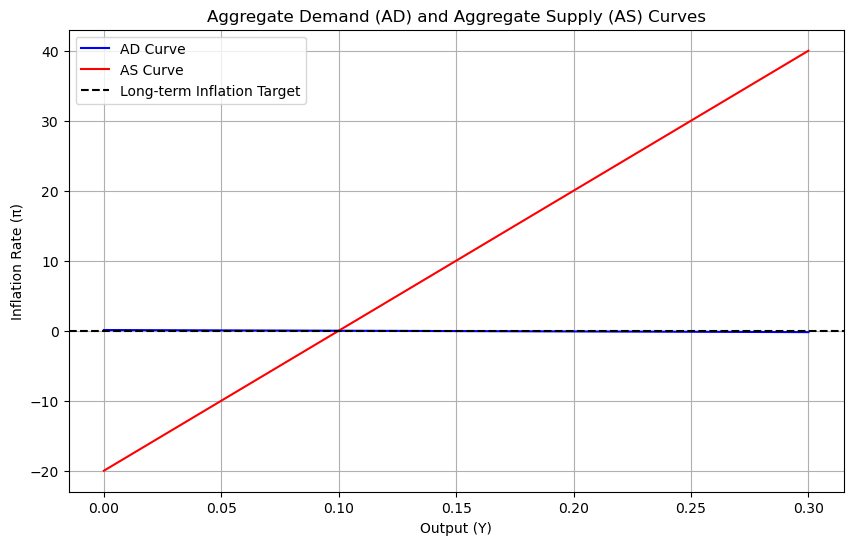

In [10]:



# Parameters provided and assumed
pi_star = 0.02  # Long-term inflation target
pi_prev = 0.02  # Previous period inflation
y_bar = 0.1
gamma = 200  # Positive slope for AS curve
beta_1 = 1  # Sensitivity parameter in AD curve, assuming values as it's not provided
beta_3 = 1  # Sensitivity parameter related to government spending in AD curve, assumed
g_bar = 0.2
g_t = 0.2  # Government spending this period
v_t = 0  # Shock term in AD curve
s_t = 0  # Shock term in AS curve

# AD and AS function definitions
def ad_curve(y_t, pi_prev, y_bar, beta_1, beta_3, g_t, g_bar, v_t):
    e_t = 0  # Assuming no error term provided
    pi_t = e_t + pi_prev - (1 / beta_1) * (y_t - y_bar) + (beta_3 / beta_1) * (g_t - g_bar) + (v_t / beta_1)
    return pi_t

def as_curve(pi_star, gamma, y_t, y_bar, s_t):
    pi_t = pi_star + gamma * (y_t - y_bar) + s_t
    return pi_t

# Generate values of y_t for the plot
output_range = np.linspace(0, 0.3, 100)

# Calculate AD and AS curves
ad_values = [ad_curve(y, pi_prev, y_bar, beta_1, beta_3, g_t, g_bar, v_t) for y in output_range]
as_values = [as_curve(pi_star, gamma, y, y_bar, s_t) for y in output_range]

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(output_range, ad_values, label='AD Curve', color='blue')
plt.plot(output_range, as_values, label='AS Curve', color='red')
plt.xlabel('Output (Y)')
plt.ylabel('Inflation Rate (π)')
plt.title('Aggregate Demand (AD) and Aggregate Supply (AS) Curves')
plt.axhline(y=pi_star, color='black', linestyle='--', label='Long-term Inflation Target')
plt.legend()
plt.grid(True)
plt.show()


This AD curve is relatively flat, suggesting that inflation is relatively insensitive to changes in output $Y$. This could be due to a lower sensitivity parameter $\beta_1$ or because the terms involving government spending $g_t$ and shocks $v_t$ are neutralizing the effects of changes in output.

The AS curve is highly sensitive to changes in output due to the high value of $\gamma$, leading to steep increases in inflation as output increases.



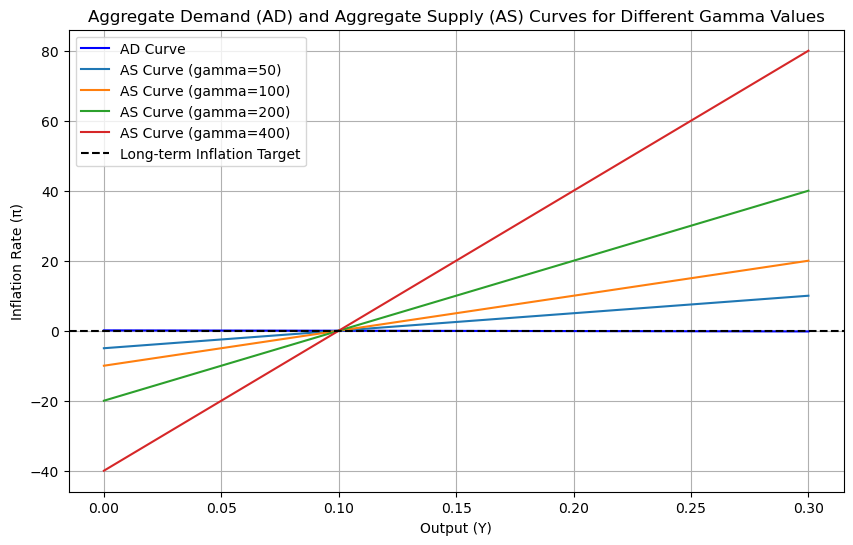

In [11]:



# Parameters provided and assumed
pi_star = 0.02  # Long-term inflation target
pi_prev = 0.02  # Previous period inflation
y_bar = 0.1
beta_1 = 1  # Sensitivity parameter in AD curve, assuming values as it's not provided
beta_3 = 1  # Sensitivity parameter related to government spending in AD curve, assumed
g_bar = 0.2
g_t = 0.2  # Government spending this period
v_t = 0  # Shock term in AD curve
s_t = 0  # Shock term in AS curve

# List of different gamma values to show how the slope changes
gamma_values = [50, 100, 200, 400]

# AD function definition
def ad_curve(y_t, pi_prev, y_bar, beta_1, beta_3, g_t, g_bar, v_t):
    e_t = 0  # Assuming no error term provided
    pi_t = e_t + pi_prev - (1 / beta_1) * (y_t - y_bar) + (beta_3 / beta_1) * (g_t - g_bar) + (v_t / beta_1)
    return pi_t

# AS function definition
def as_curve(pi_star, gamma, y_t, y_bar, s_t):
    pi_t = pi_star + gamma * (y_t - y_bar) + s_t
    return pi_t

# Generate values of y_t for the plot
output_range = np.linspace(0, 0.3, 100)

# Calculate AD curve
ad_values = [ad_curve(y, pi_prev, y_bar, beta_1, beta_3, g_t, g_bar, v_t) for y in output_range]

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(output_range, ad_values, label='AD Curve', color='blue')

# Calculate and plot AS curves for different gamma values
for gamma in gamma_values:
    as_values = [as_curve(pi_star, gamma, y, y_bar, s_t) for y in output_range]
    plt.plot(output_range, as_values, label=f'AS Curve (gamma={gamma})')

plt.xlabel('Output (Y)')
plt.ylabel('Inflation Rate (π)')
plt.title('Aggregate Demand (AD) and Aggregate Supply (AS) Curves for Different Gamma Values')
plt.axhline(y=pi_star, color='black', linestyle='--', label='Long-term Inflation Target')
plt.legend()
plt.grid(True)
plt.show()


A higher gamma value implies that the economy experiences more significant changes in inflation for a given change in the output gap. This could be due to factors such as wage and price stickiness, supply shocks, or other structural features of the economy.


Lower gamma values suggest that the economy is less sensitive to changes in output when it comes to inflation dynamics.